In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

In [15]:
# Load dataset
df = pd.read_csv("./dataset/data.csv")
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [16]:
# Overview
df.info()

# Summary statistics
df.describe()

# Shape
print("Shape:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [17]:
# Check missing values
print(df.isnull().sum())

# Check duplicates and drop
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64
Duplicate rows: 0


In [18]:
# Drop rows with missing data (if any)
df = df.dropna()

# Confirm cleanup
print("Remaining nulls:", df.isnull().sum().sum())

Remaining nulls: 0


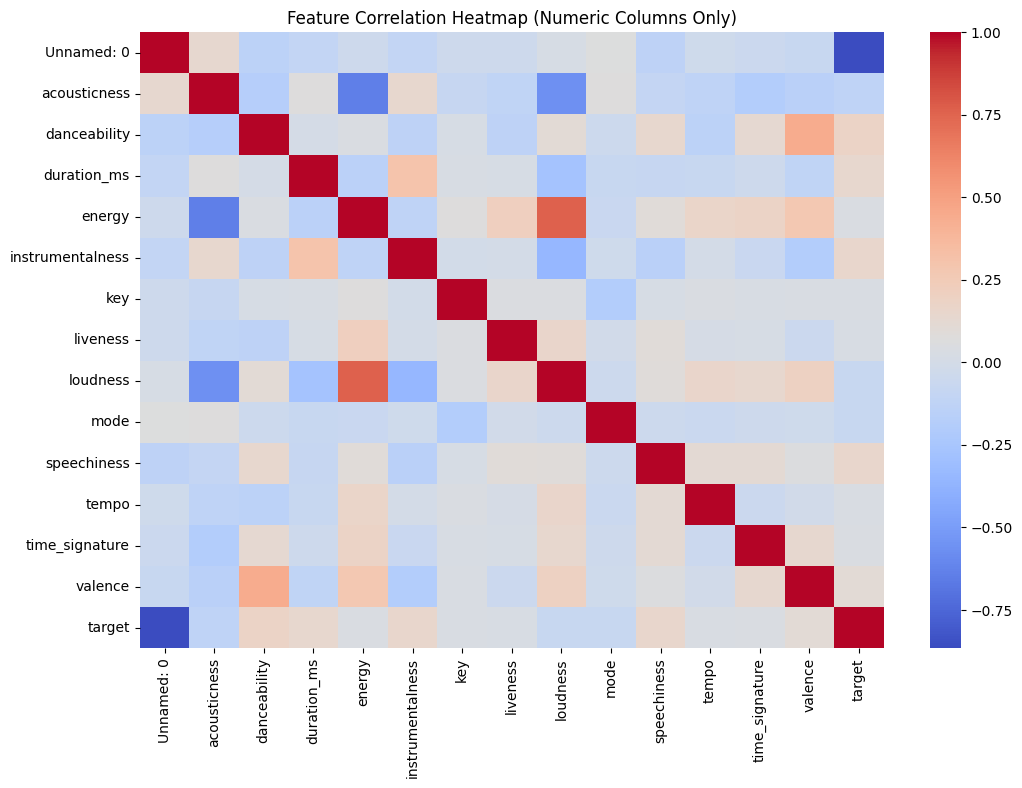

In [19]:
# Feature Correlation Check 
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap (Numeric Columns Only)")
plt.show()


In [20]:
# Remove Outliers if present
for col in ['loudness', 'tempo', 'duration_ms']:
    df[col] = np.clip(df[col], df[col].quantile(0.01), df[col].quantile(0.99))

In [21]:
#Save Clean Dataset
df.to_csv("./dataset/spotify_cleaned.csv", index=False)
print("Cleaned dataset saved: spotify_cleaned.csv")

Cleaned dataset saved: spotify_cleaned.csv


In [22]:
# Check target distribution
df['target'].value_counts(normalize=True)

# Convert classification label to float and add tiny random noise
df['preference_score'] = df['target'].astype(float) + np.random.uniform(-0.05, 0.05, size=len(df))

In [23]:
# Pick useful features
feature_cols = [
    'danceability', 'energy', 'key', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]

X = df[feature_cols]
y = df['preference_score']

In [24]:
# Scale the features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[ 1.33287384, -1.17770008, -0.91644642, ..., -0.16629082,
        -0.8530387 ,  1.08421045],
       [ 0.77382959, -1.53446769, -1.19061913, ..., -0.34645405,
         0.36896951,  1.46576808],
       [ 1.36393186, -1.28235191, -0.91644642, ..., -0.20489723,
        -1.31028018, -1.77216019],
       ...,
       [ 0.11539969,  1.20550755, -1.46479184, ...,  0.14899482,
        -0.1085039 ,  1.08497197],
       [-0.38152853,  1.47665094, -1.19061913, ..., -0.64050617,
         0.51059297,  1.08226858],
       [-1.07101644,  1.11036953,  1.00276257, ...,  0.17473242,
        -0.38365806,  2.60423004]], shape=(2017, 10))

In [25]:
# Create Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

In [27]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Store results
results = []

In [28]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R² Score": r2
    })

In [29]:

# Convert to DataFrame for clean view
results_df = pd.DataFrame(results)
print("\n📊 Model Performance Comparison:\n")
print(results_df)


📊 Model Performance Comparison:

               Model       MAE      RMSE  R² Score
0  Linear Regression  0.453373  0.481295  0.086241
1      Random Forest  0.332147  0.414870  0.321056
2  Gradient Boosting  0.352176  0.425352  0.286316


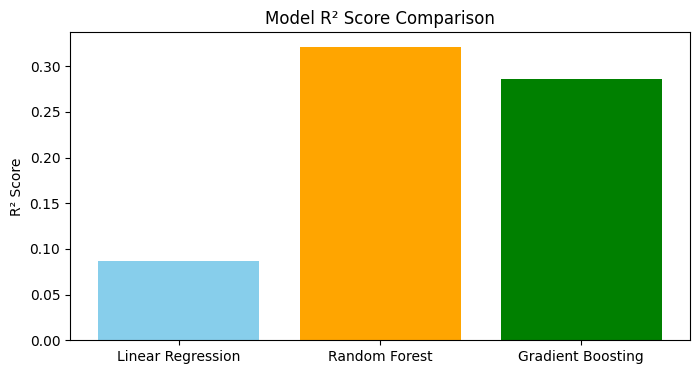

In [30]:
# Visualise
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.bar(results_df["Model"], results_df["R² Score"], color=['skyblue', 'orange', 'green'])
plt.title("Model R² Score Comparison")
plt.ylabel("R² Score")
plt.show()

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

# Pick the best-performing model (change if needed)
best_model = models["Random Forest"]

In [32]:

# 1️⃣ Predict preference scores for all songs
df['predicted_score'] = best_model.predict(X_scaled)

In [37]:
# 2️⃣ Define a function to recommend top N songs for a given input song
def recommend_songs(song_name, top_n=5, weight_pred=0.7, weight_sim=0.3):
    # Check if the song exists
    if song_name not in df['song_title'].values:
        print(f"❌ Song '{song_name}' not found in dataset.")
        return None

    # Extract feature vector for the input song
    input_features = df[df['song_title'] == song_name][feature_cols]
    input_scaled = scaler.transform(input_features)

    # Compute similarity
    similarities = cosine_similarity(input_scaled, X_scaled)[0]
    df['similarity'] = similarities

    # Combine predicted liking and feature similarity
    df['combined_score'] = (
        weight_pred * df['predicted_score'] + weight_sim * df['similarity']
    )

    # Exclude the same song and get top N
    recommendations = (
        df[df['song_title'] != song_name]
        .sort_values('combined_score', ascending=False)
        [['song_title', 'artist', 'combined_score']]
        .head(top_n)
    )

    print(f"\n🎶 Top {top_n} Recommended Songs similar to '{song_name}':\n")
    return recommendations.reset_index(drop=True)

In [35]:
# Show first 20 song titles to choose from
print(df['song_title'].head(20).to_string(index=False))

                            Mask Off
                             Redbone
                        Xanny Family
                      Master Of None
                      Parallel Lines
                            Sneakin’
                         Childs Play
                     Gyöngyhajú lány
                   I've Seen Footage
                      Digital Animal
Subways - In Flagranti Extended Edit
          Donme Dolap - Baris K Edit
                             Cemalim
                           One Night
                             Oh lala
                                Char
                     World In Motion
           One Nation Under a Groove
                             Bouncin
                C O O L - Radio Edit



🎶 Top 5 Recommended Songs similar to 'Mask Off':



/mnt/storage/Repos/Music-Taste-Predictor/env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


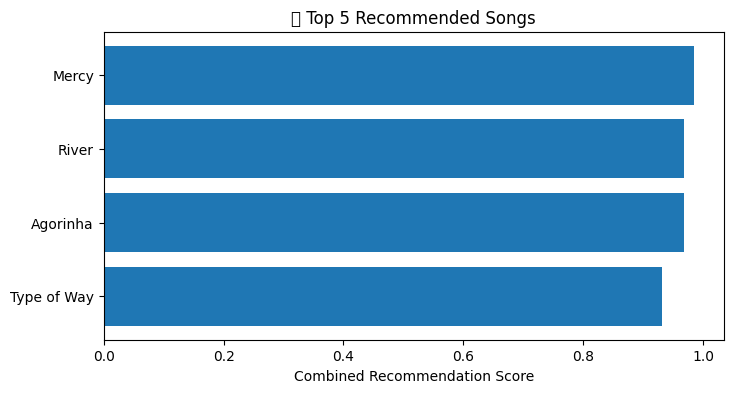

In [40]:
recs = recommend_songs("Mask Off", top_n=5)

if recs is not None:
    plt.figure(figsize=(8,4))
    plt.barh(recs['song_title'], recs['combined_score'])
    plt.gca().invert_yaxis()
    plt.title("🎧 Top 5 Recommended Songs")
    plt.xlabel("Combined Recommendation Score")
    plt.show()